In [266]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import numpy as np
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.display.max_rows = 5000 #(设定能显示的行数)

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

In [188]:
palm = yf.Ticker('PALM.L')
palm_2020 = palm.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d'))
# palm_2020.head()

#####  *PALM had 3 placings since 2020.1.1, Jan 10.00,  Jul 6.50 and Dec 10.00*
create columns and fill in the prices

In [189]:
# placing in Jan 2020
colname_Jan2020 = 'Placing_Price_Jan'
placing_Jan2020 = '2020-01-31'
rprice_Jan2020 = 10

palm_2020[colname_Jan2020] = rprice_Jan2020

palm_2020.loc[palm_2020.index <= placing_Jan2020, colname_Jan2020] = None

In [191]:
# placing in Jul 2020
colname_Jul2020 = 'Placing_Price_Jul'
placing_Jul2020 = '2020-07-31'
rprice_Jul2020 = 6.5

palm_2020[colname_Jul2020] = rprice_Jul2020

palm_2020.loc[palm_2020.index <= placing_Jul2020, colname_Jul2020] = None

In [192]:
# placing in Dec 2020
colname_Dec2020 = 'Placing_Price_Dec'
placing_Dec2020 = '2020-12-31'
rprice_Dec2020 = 10

palm_2020[colname_Dec2020] = rprice_Dec2020

palm_2020.loc[palm_2020.index <= placing_Dec2020, colname_Dec2020] = None

In [203]:
# 情况，出现两个highest points, I choose the latest one [-1].
# hcp stands for hightest close price
hcp_idx = palm_2020[palm_2020['Close'] == palm_2020.Close.max()].index[-1]

print(palm_2020.Close.max())

print(hcp_idx)

17.0
2021-01-05 00:00:00


In [268]:
# palm_2020

##### plotting

In [155]:
df = palm_2020

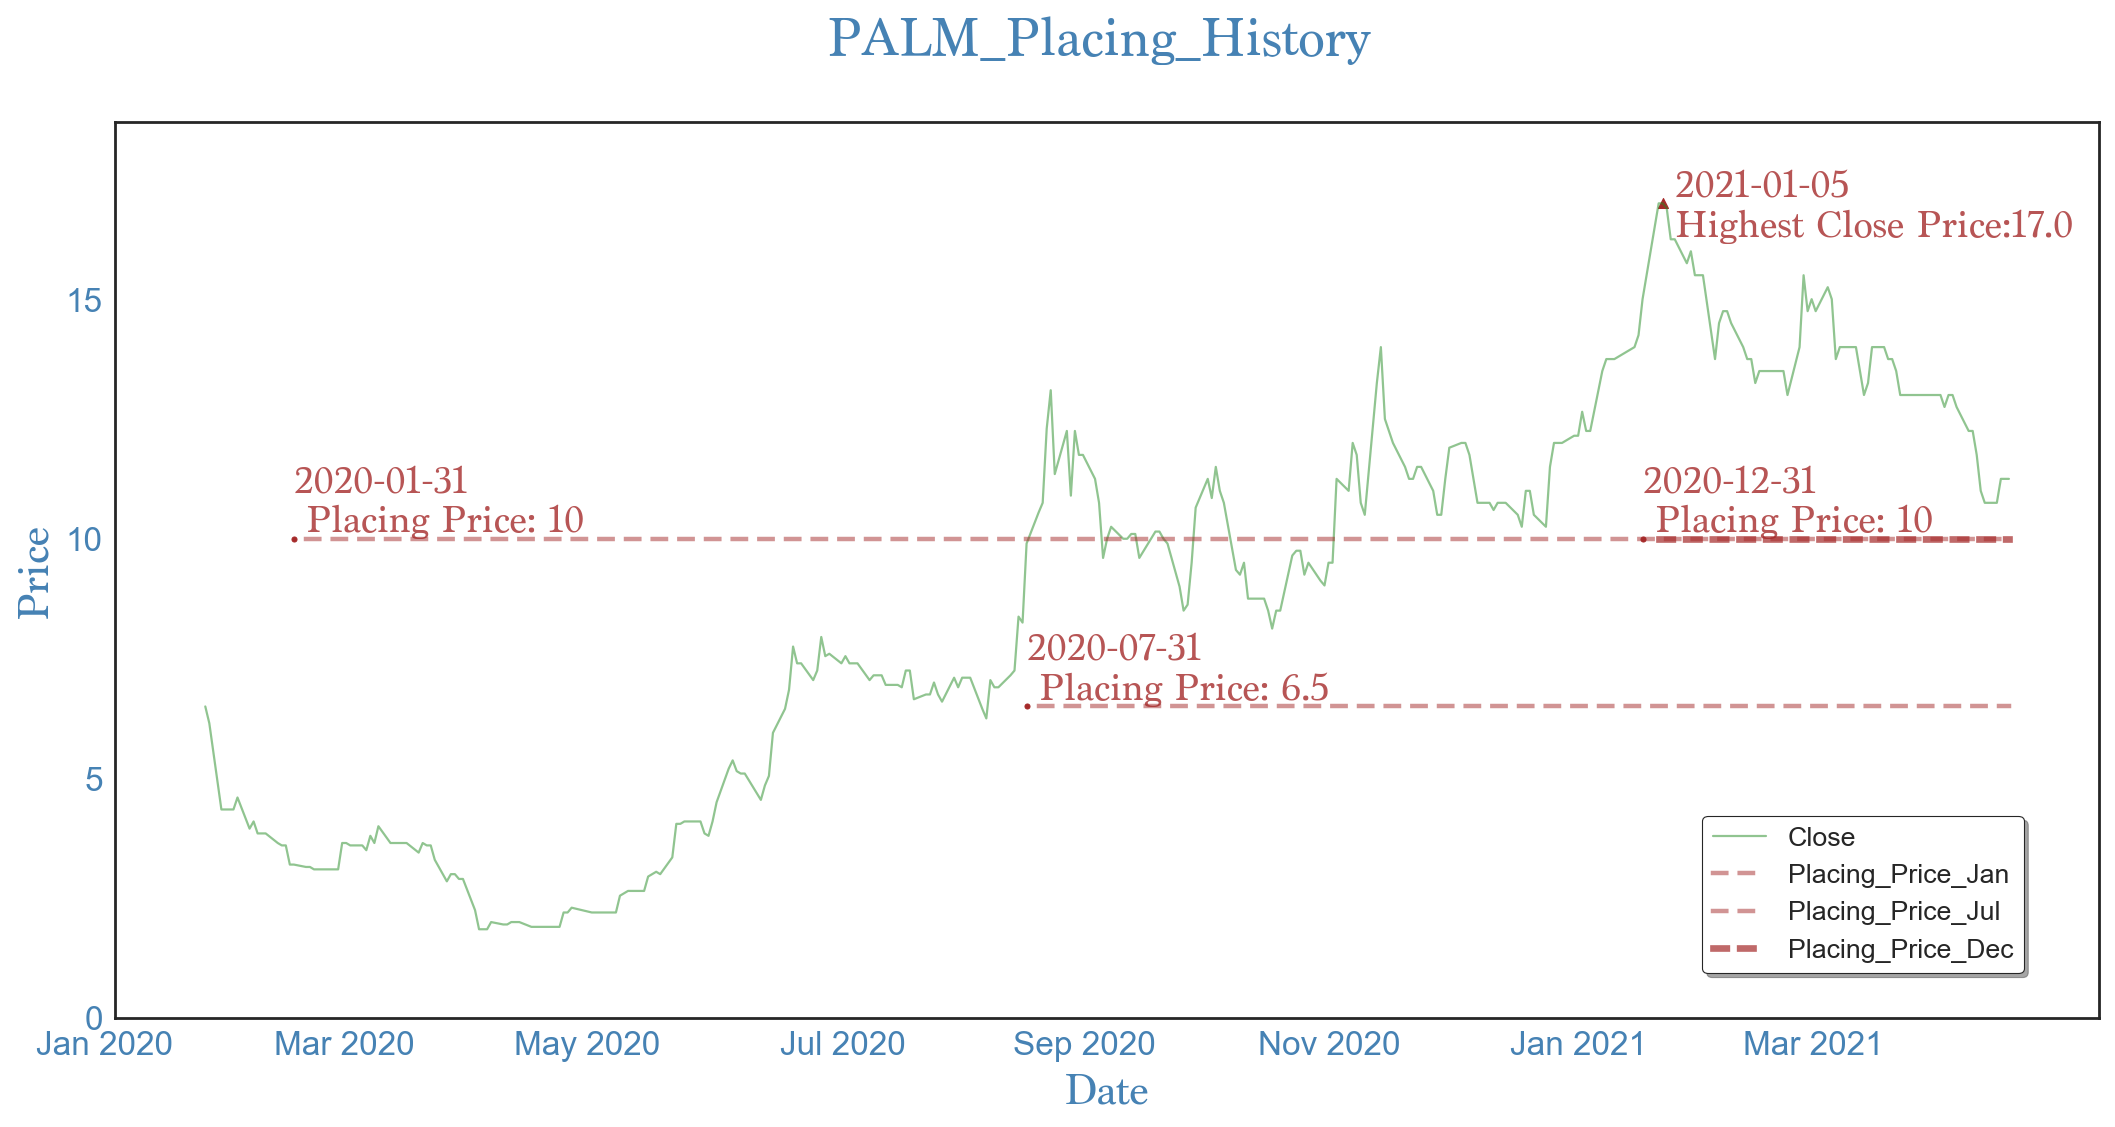

In [264]:
# size and style
# popular sytles: 'fivethirtyeight', 'seaborn-dark','seaborn','Seaborn-dark','seaborn-poster','seaborn-ticks',
# 'seaborn-white','fast','seaborn-whitegrid','dark_background','classic','bmh','Solarize_Light2'
plt.figure(figsize=(16,8) , frameon=False) 
plt.style.use('seaborn-white')

#______________________________________________________________________________________

# CONTRAL PANEL
plot_title = 'PALM_Placing_History'
clr_title = 'steelblue'

# colour scheme control
clr_close = 'forestgreen'
alpha_close = 0.5

clr_placing1 = 'brown'
alpha_placing1_text = 0.8
alpha_placing1_line = 0.5

clr_placing2 = 'brown'
alpha_placing2_text = 0.8
alpha_placing2_line = 0.5

clr_placing3 = 'brown'
alpha_placing3_text = 0.8
alpha_placing3_line = 0.7

clr_hcp = 'brown'
alpha_hcp = 0.8


# font
font = 'Marion'

#______________________________________________________________________________________
# plot the close price
df.Close.plot( color=clr_close, alpha=alpha_close, linewidth=1)

# pay attention on: colnames
# marker
plt.scatter(placing_Jan2020, rprice_Jan2020, color=clr_hcp, marker='.');
plt.scatter(placing_Jul2020, rprice_Jul2020, color=clr_hcp, marker='.');
plt.scatter(placing_Dec2020, rprice_Dec2020, color=clr_hcp, marker='.');
# placing h-line
df[placing_Jan2020:][colname_Jan2020].plot( color= clr_placing1, alpha=alpha_placing1_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
df[df.index >= placing_Jul2020][colname_Jul2020].plot( color=clr_placing2, alpha=alpha_placing2_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
df[df.index >= placing_Dec2020][colname_Dec2020].plot( color=clr_placing3, alpha=alpha_placing3_line, linewidth=3, ls='dashed',dash_capstyle='projecting')

# placing text
plt.text(placing_Jan2020, rprice_Jan2020+0.15, '{} \n Placing Price: {}'.format(placing_Jan2020,rprice_Jan2020), fontsize=18, color= clr_placing1, alpha=alpha_placing1_text, fontname=font)
plt.text(placing_Jul2020, rprice_Jul2020+0.15, '{} \n Placing Price: {}'.format(placing_Jul2020,rprice_Jul2020), fontsize=18, color= clr_placing2, alpha=alpha_placing2_text, fontname=font)
plt.text(placing_Dec2020, rprice_Dec2020+0.15, '{} \n Placing Price: {}'.format(placing_Dec2020,rprice_Dec2020), fontsize=18, color= clr_placing3, alpha=alpha_placing3_text, fontname=font)


# plot the highest close price dot
plt.scatter(hcp_idx, df.Close.max(), color=clr_hcp, marker='^', );
plt.text(hcp_idx, df.Close.max()-0.7, ' {}\n Highest Close Price:{}'.format(str(highest_point_idx)[:10], df.Close.max()),fontname=font, fontsize=18, color=clr_hcp, alpha = alpha_hcp)

# title, legend, labels and others
plt.title('{} \n'.format(plot_title), fontsize=25, color=clr_title,fontname=font)
plt.legend(loc=(0.8,0.05), fontsize=12, frameon=True, fancybox=True,shadow=True, framealpha=None, facecolor='inherit')

plt.yticks(fontsize=15,color=clr_title)
plt.ylim(0,df.Close.max()+df.Close.max()*0.1)
plt.ylabel('Price', fontsize=20,fontname=font, color=clr_title)


plt.xticks( fontsize=15,color=clr_title, rotation=0)
plt.xlabel('Date', fontsize=20,fontname=font, color=clr_title)

# from matplotlib.dates import DateFormatter
# date_form = DateFormatter("%m-%d")
# plt.set_major_formatter(date_form)

plt.savefig('{}'.format(plot_title),dpi=300,bbox_inches ='tight',
pad_inches = 1,
transparent = True,
orientation ='landscape'
)
plt.show()
